In [1]:
import numpy as np
import scipy
import sklearn
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture,BayesianGaussianMixture

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['image.cmap'] = 'Greys'

import seaborn as sns

import sys,os,pdb,copy,pickle
from importlib import reload
# import pynapple as nap

sys.path.append('/mnt/home/szheng/projects/seq_detection2/code')
sys.path.append('/mnt/home/szheng/projects/util_code')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis/scripts')
sys.path.append('/mnt/home/szheng/projects/cluster_spikes')
sys.path.append('/mnt/home/szheng/projects/place_variability/code')
import data_prep_new as dpn
import place_cell_analysis as pa
import plot_helper as ph
import preprocess as prep
import nmf_analysis as na
import nmf_plot as nmfp
reload(na)

import raster_new as rn
import data_prep_pyn as dpp


import change_point_analysis as cpa
import change_point_plot as cpp

import place_field_analysis as pf

import switch_analysis_one_session as saos
reload(saos)

import process_central_arm as pca 
import change_point_analysis_central_arm_seperate as cpacas

import misc
reload(misc)
from misc import get_nth_key, get_nth_val

67 sessions!
67 sessions!


In [2]:
figdir = '/mnt/home/szheng/ceph/place_variability/fig/paper/figure3'
misc.get_or_create_subdir(figdir)
data_dir = '/mnt/home/szheng/ceph/place_variability/data/paper'
misc.get_or_create_subdir(data_dir)

'/mnt/home/szheng/ceph/place_variability/data/paper'

In [3]:
import database
db = database.db

subdb = db.query('owner=="roman"').sort_values('n_pyr_putative',ascending=False)
subdb = subdb.query('ntrials>=20&n_neurons>=50')
to_exclude_sess = ['e16_3m2_211211']
subdb=subdb.loc[~subdb['sess_name'].isin(to_exclude_sess)].iloc[:20]


import pf_recombine_central as pfrc
import fr_map_one_session as fmos
import switch_detection_one_session as sdos
reload(sdos)
import get_all_switch_add_metrics as gasam
reload(gasam)

import preprocess_one_session as prepos

/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [5]:
%%time
all_fields_recombined_all = {}
pf_params_recombined_all = {}
fr_map_trial_df_all = {}
pval_all = {}
best_n_all = {}
X_pwc_all = {}
X_raw_all = {}
changes_df_all = {}
var_res_all = {}
corr_all = {}
all_sw_d_all = {}
all_sw_with_metrics_d_all = {}
trial_index_to_index_within_df_all = {}

spk_beh_df_all = {}

for ind,row in subdb.iterrows():
    data_dir_full = row['data_dir_full']
    ani = ind[0]
    sess = row['sess_name']
    
    res=dpp.load_spk_beh_df(data_dir_full,load_only=True)
    if res is not None:
        spk_beh_df = res['spk_beh_df']
        spk_beh_df,_ = dpp.add_lin_binned(spk_beh_df,bin_size=2.2,nbins=None)
        spk_beh_df_all[ani,sess] = spk_beh_df
        trial_index_to_index_within_df = dpp.trial_index_to_index_within_trialtype(spk_beh_df)
        trial_index_to_index_within_df_all[ani,sess] = trial_index_to_index_within_df
        

    pf_res_recombine = pfrc.main(data_dir_full,force_reload=False,load_only=True)

    all_fields_recombined=pf_res_recombine['all_fields_recombined']
    all_fields_recombined_all[ani,sess] = all_fields_recombined
    pf_params_recombined = pf_res_recombine['params_recombined']
    pf_params_recombined_all[ani,sess] = pf_params_recombined

    fr_map_all = fmos.main(data_dir_full,force_reload=False,load_only=True)
    fr_map_trial_df = fr_map_all['fr_map_trial_df']
    fr_map_trial_df_all[ani,sess] = fr_map_trial_df



    sw_res = sdos.main(data_dir_full,force_reload=False,load_only=True)
    pval = sw_res['pval']
    pval_all[ani,sess]=pval
    best_n = sw_res['best_n']
    best_n_all[ani,sess] = best_n
    X_pwc = sw_res['X_pwc']
    X_pwc_all[ani,sess] = X_pwc
    X_raw = sw_res['X_raw']
    X_raw_all[ani,sess]=X_raw
    changes_df = sw_res['changes_df']
    changes_df_all[ani,sess] = changes_df
    var_res = sw_res['var_res']
    var_res_all[ani,sess]=var_res
    corr = sw_res['corr']
    corr_all[ani,sess] = corr

    sw_info_res=gasam.main(data_dir_full,force_reload=False,load_only=True)
    if sw_info_res is None:
        sw_info_res=gasam.main(data_dir_full,force_reload=True,load_only=False)
    all_sw_d = sw_info_res['all_sw_d']
    all_sw_d_all[ani,sess] = all_sw_d
    all_sw_with_metrics_d = sw_info_res['all_sw_with_metrics_d']
    all_sw_with_metrics_d_all[ani,sess] = all_sw_with_metrics_d

all_fields_recombined_all = pd.concat(all_fields_recombined_all,axis=0)
pf_params_recombined_all = pd.concat(pf_params_recombined_all,axis=0)
fr_map_trial_df_all = pd.concat(fr_map_trial_df_all,axis=0)
pval_all = pd.concat(pval_all,axis=0)
X_pwc_all = pd.concat(X_pwc_all,axis=0)
X_raw_all = pd.concat(X_raw_all,axis=0)
changes_df_all = pd.concat(changes_df_all,axis=0)
var_res_all = pd.concat(var_res_all,axis=0)
corr_all = pd.concat(corr_all,axis=0)
all_sw_d_all = pd.concat(all_sw_d_all,axis=0)
all_sw_with_metrics_d_all = pd.concat(all_sw_with_metrics_d_all,axis=0)
best_n_all = pd.concat(best_n_all,axis=0)

spk_beh_df_all = pd.concat(spk_beh_df_all,axis=0)


/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/place_field_afterheadscan_recombine.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/fr_map.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/sw_res_afterheadscan_fr_mean.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/switch_analysis/all_sw_info_fr_mean.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117/py_data/place_field_afterheadscan_recombine.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117/py_data/fr_map.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117/py_data/sw_res_afterheadscan_fr_mean.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117/py_data/switch_analysis/all_sw_info_fr_mean.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_d

/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210317/py_data/place_field_afterheadscan_recombine.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210317/py_data/fr_map.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210317/py_data/sw_res_afterheadscan_fr_mean.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210317/py_data/switch_analysis/all_sw_info_fr_mean.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210312/py_data/place_field_afterheadscan_recombine.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210312/py_data/fr_map.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210312/py_data/sw_res_afterheadscan_fr_mean.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210312/py_data/switch_analysis/all_sw_info_fr_mean.p exists; loading---
CPU times: user 10.6 s, sys: 7.3

In [4]:
import pairwise_analysis as pwa
reload(pwa)
import switch_metrics as sm
reload(sm)
import test_co_switch as tcs
reload(tcs)
import shuffle_changes_df_one_session as scdos

In [6]:
fn = 'prepped_data_agg.p'
fn_full = os.path.join(data_dir,fn)
prepped_data_agg = pickle.load(open(fn_full,'rb'))

In [8]:
all_fields_recombined_all = prepped_data_agg['all_fields_recombined_all']
pf_params_recombined_all=  prepped_data_agg['pf_params_recombined_all']
fr_map_trial_df_all= prepped_data_agg['fr_map_trial_df_all']
pval_all = prepped_data_agg['pval_all']
X_pwc_all = prepped_data_agg['X_pwc_all']
X_raw_all = prepped_data_agg['X_raw_all']
changes_df_all = prepped_data_agg['changes_df_all']
var_res_all = prepped_data_agg['var_res_all']
corr_all = prepped_data_agg['corr_all']
all_sw_d_all = prepped_data_agg['all_sw_d_all']
all_sw_with_metrics_d_all = prepped_data_agg['all_sw_with_metrics_d_all']
best_n_all = prepped_data_agg['best_n_all']
spk_beh_df_all = prepped_data_agg['spk_beh_df_all']


In [9]:
row = subdb.iloc[2]
task_index=0
data_dir_full=ddf = row['data_dir_full']
ani=row['animal_name.1']
sess = row['sess_name']
# ani,sess,task_index = 'e13_26m1','e13_26m1_210913',0
changes_df_one = changes_df_all.loc[ani,sess,task_index]
all_sw_d_one = all_sw_d_all.loc[ani,sess,task_index]
pf_params_recombined_one=pf_params_recombined_all.loc[ani,sess]
# changes_df_one = changes_df_all.loc[ani,sess]
spk_beh_df = spk_beh_df_all.loc[ani,sess]

/tmp/ipykernel_557191/1895150068.py:7: PerformanceWarning: indexing past lexsort depth may impact performance.
  changes_df_one = changes_df_all.loc[ani,sess,task_index]
/tmp/ipykernel_557191/1895150068.py:8: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_sw_d_one = all_sw_d_all.loc[ani,sess,task_index]
/tmp/ipykernel_557191/1895150068.py:9: PerformanceWarning: indexing past lexsort depth may impact performance.
  pf_params_recombined_one=pf_params_recombined_all.loc[ani,sess]
/tmp/ipykernel_557191/1895150068.py:11: PerformanceWarning: indexing past lexsort depth may impact performance.
  spk_beh_df = spk_beh_df_all.loc[ani,sess]


In [10]:
reload(tcs)

<module 'test_co_switch' from '/mnt/home/szheng/projects/place_variability/code/test_co_switch.py'>

In [8]:
reload(tcs)
shuffle_res,share_shuffle = tcs.shuffle_test_pair_share_onoff(changes_df_one,nrepeats=100,alpha=0.025,min_cpd_win=2)

(<Figure size 432x288 with 1 Axes>, <Axes: >)

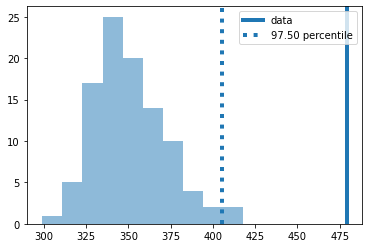

In [9]:
onoff_str = 'on'
data=shuffle_res.loc['count',onoff_str]
shuffle=share_shuffle[onoff_str]
ph.plot_shuffle_data_dist_with_thresh(shuffle,data)

# visualize coswitching and cofiring

# ripple cofiring stuff

In [40]:
sw_sim_allonoff,time_diff = pwa.get_sw_sim(all_sw_d_one,diff_key='trial_index',win_l=[0,1,2],decay_rate_l=[])
reload(sdos)
reload(tcs)
reload(scdos)
shuffle_all_sw_one=scdos.main(ddf,test_mode=False,dosave=False,force_reload=False,load_only=True)

sw_sim_allonoff_shuffle = []
for ii,allsw in enumerate(shuffle_all_sw_one[:1000]):
    ss, td=pwa.get_sw_sim(allsw,diff_key='trial_index',win_l=[0,1,2],decay_rate_l=[])
#     sw_sim_allonoff_shuffle[ii]=sw_sim_allonoff
    sw_sim_allonoff_shuffle.append(ss)


/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220118/py_data/shuffle_all_sw_afterheadscan_fr_mean.p exists; loading---


In [41]:
# generic preoprocess
mat_to_return=prep.load_stuff(data_dir_full)
# sessionPulses=mat_to_return['sessionPulses']
# filtered = mat_to_return['filtered']
# behavior=mat_to_return['behavior']
ripples = mat_to_return['ripples']
cell_metrics=mat_to_return['cell_metrics']
mergepoints = mat_to_return['mergepoints']

res_all_epochs_d, ripple_time_ints_epochs_d = prep.get_spike_count_rate_participation_in_ripple_all(cell_metrics,
                                                                                                    ripples,
                                                                                                    mergepoints,
                                                                                                   )

import pairwise_analysis as pwa
reload(pwa)
ripple_sim_d = pwa.get_all_ripple_pairwise_sim(cell_metrics,ripples,mergepoints)

/tmp/ipykernel_819525/889719513.py:12: PerformanceWarning: indexing past lexsort depth may impact performance.
  label_sim_one = ripple_sim_d.loc['ripple_only',ripple_key,epoch]


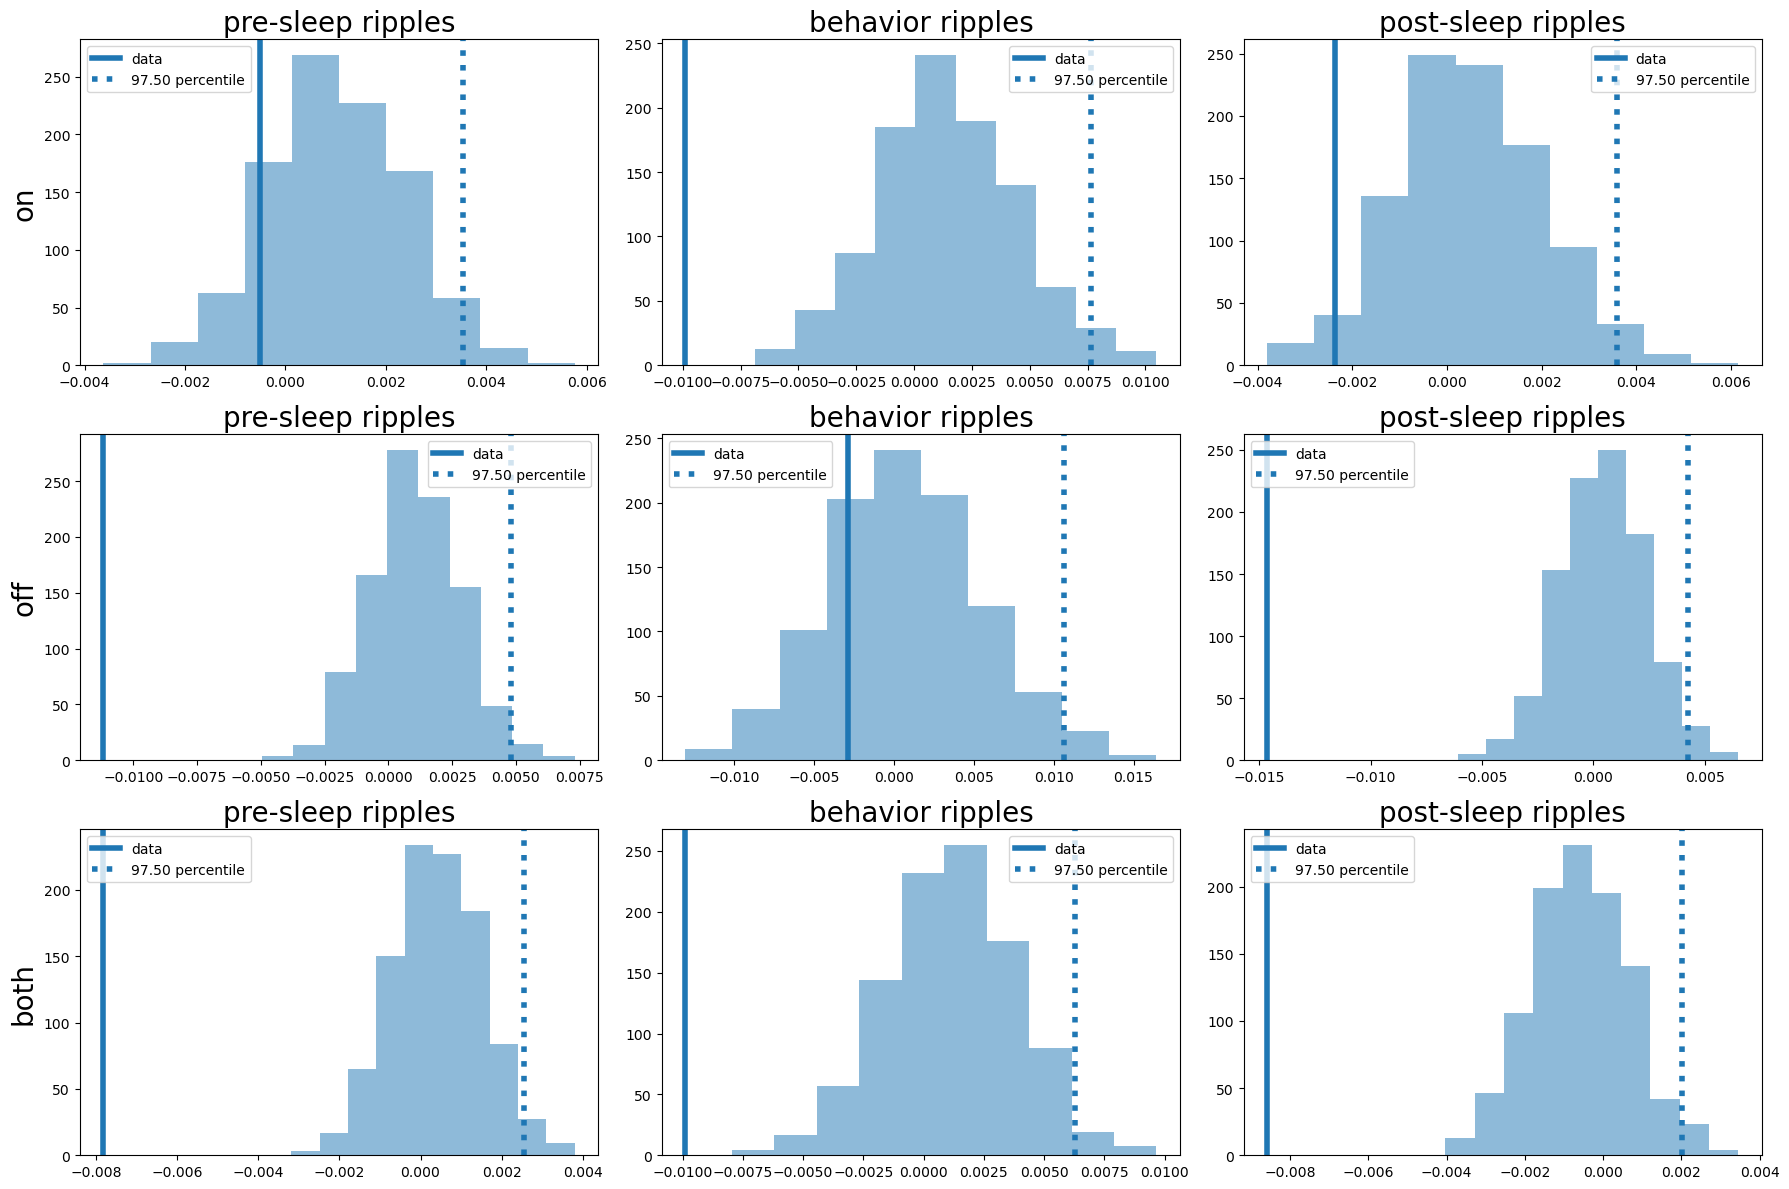

In [44]:
onoff=1
onoff_str_d = {1:'on',-1:'off','both':'both'}
sw_key='within_0'
ripple_key = 'participation_in_interval'# 'count_in_interval'


fig,axs = plt.subplots(3,3,figsize=(6*3,4*3))
for ii,onoff in enumerate([1,-1,'both']):
    onoff_str=onoff_str_d[onoff]
    epoch_name = ['pre-sleep ripples','behavior ripples','post-sleep ripples']
    for jj,epoch in enumerate([0,1,2]):
        label_sim_one = ripple_sim_d.loc['ripple_only',ripple_key,epoch]
        co_sw_sim_one = sw_sim_allonoff.loc[onoff,sw_key]
    
        ax=axs[ii,jj]
        diff_data,diff_data_sh_l,pval,fig,ax=pwa.shuffle_test_label_switch_diff_plot(label_sim_one,co_sw_sim_one,sw_sim_allonoff_shuffle,onoff=onoff,sw_key=sw_key,
                                            fig=fig,ax=ax,doplot=True
                                           )
        title = epoch_name[jj]
        ax.set_title(title)
        if jj==0:
            ax.set_ylabel(onoff_str)
plt.tight_layout()
